## Experiment

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [17]:
results_df=pd.read_csv('results.csv')
results_df

,n_train,train_acc,train_cost,test_acc,test_cost,step
0,2,0.0,0.773656,0.31,0.823990,1
1,2,1.0,0.648305,0.48,0.746307,2
2,2,1.0,0.541529,0.51,0.679170,3
3,2,1.0,0.449752,0.62,0.619267,4
4,2,1.0,0.371634,0.72,0.565504,5
...,...,...,...,...,...,...
4795,80,1.0,0.004077,1.00,0.004793,96
4796,80,1.0,0.004016,1.00,0.004741,97
4797,80,1.0,0.003955,1.00,0.004690,98
4798,80,1.0,0.003896,1.00,0.004639,99


In [18]:
df_agg = results_df.groupby(["n_train", "step"]).agg(["mean", "std"]).reset_index()
df_agg

n_train step train_acc           train_cost           test_acc            \
                      mean       std       mean       std     mean       std   
0         2    1    0.5000  0.462910   0.706425  0.262603  0.52625  0.162651   
1         2    2    0.7500  0.267261   0.523950  0.236536  0.61875  0.125634   
2         2    3    0.9375  0.176777   0.390731  0.212114  0.64750  0.166969   
3         2    4    1.0000  0.000000   0.295724  0.187632  0.67000  0.182678   
4         2    5    1.0000  0.000000   0.227217  0.162698  0.67625  0.194344   
..      ...  ...       ...       ...        ...       ...      ...       ...   
595      80   96    1.0000  0.000000   0.004300  0.001062  1.00000  0.000000   
596      80   97    1.0000  0.000000   0.004238  0.001047  1.00000  0.000000   
597      80   98    1.0000  0.000000   0.004177  0.001032  1.00000  0.000000   
598      80   99    1.0000  0.000000   0.004118  0.001017  1.00000  0.000000   
599      80  100    1.0000  0.000000   0.004059  0.001003  1.00000  0.000000   

    test_cost            
         mean       std  
0    0.671690  0.133560  
1    0.624842  0.106794  
2    0.597866  0.091986  
3    0.583865  0.098487  
4    0.578028  0.123960  
..        ...       ...  
595  0.007387  0.002566  
596  0.007325  0.002553  
597  0.007264  0.002541  
598  0.007204  0.002529  
599  0.007146  0.002517  

[600 rows x 10 columns]

Generalization errors: [0.8476090690764977, 0.3283242376364797, 0.2487582908797777, 0.03505651924933774, 0.011283497791737313, 0.003086503333179287]


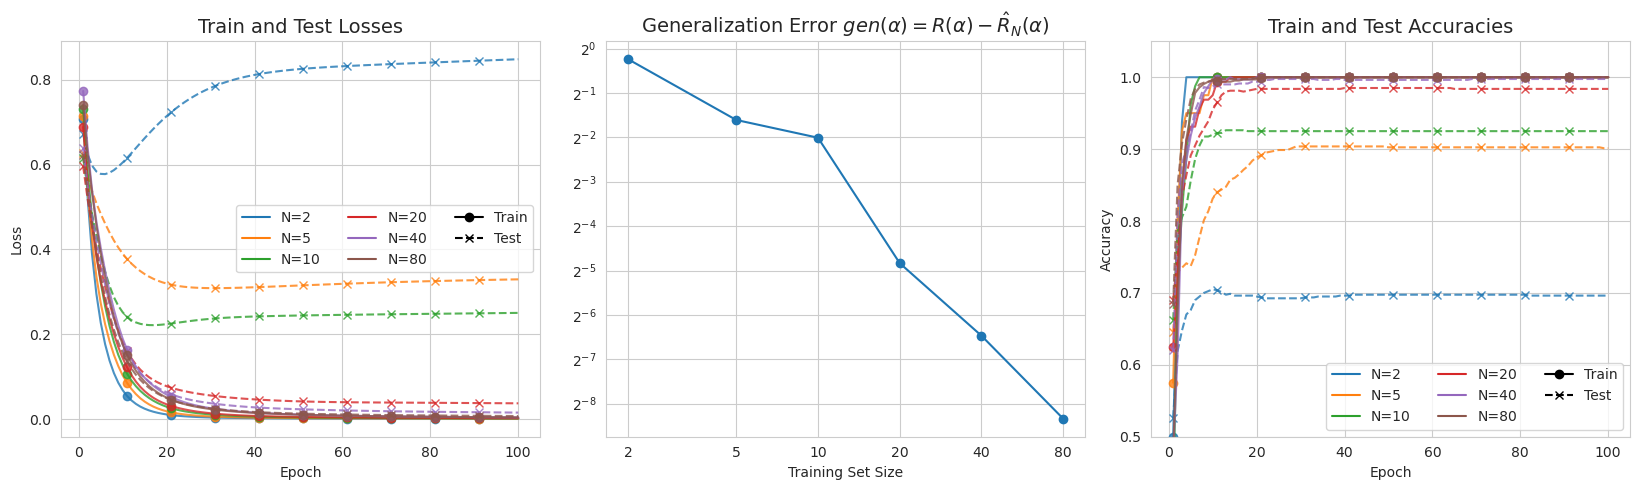

In [19]:
train_sizes=[2,5,10,20,40,80]

# Plotting
sns.set_style('whitegrid')
colors = sns.color_palette()
fig, axes = plt.subplots(ncols=3, figsize=(16.5, 5))

generalization_errors = []

# Plot losses and accuracies
for i, n_train in enumerate(train_sizes):
    df = df_agg[df_agg.n_train == n_train]
    dfs = [df.train_cost["mean"], df.test_cost["mean"], df.train_acc["mean"], df.test_acc["mean"]]
    lines = ["o-", "x--", "o-", "x--"]
    labels = [fr"$N={n_train}$", None, fr"$N={n_train}$", None]
    axs = [0, 0, 2, 2]

    for k in range(4):
        ax = axes[axs[k]]
        ax.plot(df.step, dfs[k], lines[k], label=labels[k], markevery=10, color=colors[i], alpha=0.8)

    # Compute generalization error
    dif = df[df.step == 100].test_cost["mean"].values[0] - df[df.step == 100].train_cost["mean"].values[0]
    generalization_errors.append(dif)
print("Generalization errors:", generalization_errors)
# Format plots
axes[0].set_title('Train and Test Losses', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(train_sizes, generalization_errors, "o-", label=r"$gen(\alpha)$")
axes[1].set_xscale('log')
axes[1].set_xticks(train_sizes)
axes[1].set_xticklabels(train_sizes)
axes[1].set_title(r'Generalization Error $gen(\alpha) = R(\alpha) - \hat{R}_N(\alpha)$', fontsize=14)
axes[1].set_xlabel('Training Set Size')
axes[1].set_yscale('log', base=2)

axes[2].set_title('Train and Test Accuracies', fontsize=14)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0.5, 1.05)

legend_elements = (
    [mpl.lines.Line2D([0], [0], label=f'N={n}', color=colors[i]) for i, n in enumerate(train_sizes)] +
    [
        mpl.lines.Line2D([0], [0], marker='o', ls='-', label='Train', color='Black'),
        mpl.lines.Line2D([0], [0], marker='x', ls='--', label='Test', color='Black')
    ]
)

axes[0].legend(handles=legend_elements, ncol=3)
axes[2].legend(handles=legend_elements, ncol=3)

plt.tight_layout()
plt.show()